# Brain Age Alzheimer Disease

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = ElasticNetRegressor()
Plotters = Plotter()

In [4]:
nameset ='ElasticNet'

# Data

In [5]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

path_metric = f'{path}Multiple_Brain_Age_Clocks/pre_data/'


file_path_CN = f'{path_metric}CN_combined.xlsx'
file_path_AD = f'{path_metric}AD_combined.xlsx'
file_path_FTD = f'{path_metric}FTD_combined.xlsx'
file_path_MCI = f'{path_metric}MCI_combined.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

path_metric = f'{path}/Brain_Age_Clock/data_freq/'


file_path_CN = f'{path_metric}CN_freq.xlsx'
file_path_AD = f'{path_metric}AD_freq.xlsx'
file_path_FTD = f'{path_metric}FTD_freq.xlsx'
file_path_MCI = f'{path_metric}MCI_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [10]:
df_MCI_filtrado

,Unnamed: 0,Delta_canon_EPP_ORB_left,Delta_canon_EPP_ORB_right,Delta_canon_EPP_IFG_left,Delta_canon_EPP_IFG_right,Delta_canon_EPP_MFG_left,Delta_canon_EPP_MFG_right,Delta_canon_EPP_SFG_left,Delta_canon_EPP_SFG_right,Delta_canon_EPP_HPC_left,...,Country,Eurolad_code,GINI,Group,ID,Diagnosis,ID_unique,Country_,Country_unique,Region
0,0,0.027003,0.029287,0.025930,0.028103,0.026956,0.025955,0.029690,0.030135,0.028117,...,Colombia,Col_USCO,54.800000,MCI,sub-10003,1,0,Colombia,Colombia,America
1,1,0.033561,0.030967,0.030743,0.031499,0.029547,0.029677,0.031265,0.032300,0.030579,...,Colombia,Col_USCO,54.800000,MCI,sub-10004,1,1,Colombia,Colombia,America
2,2,0.028574,0.032363,0.027087,0.036634,0.024528,0.028081,0.029861,0.032311,0.029078,...,Colombia,Col_USCO,54.800000,MCI,sub-10005,1,2,Colombia,Colombia,America
3,3,0.035821,0.050003,0.036498,0.042015,0.043910,0.048830,0.044828,0.062187,0.041965,...,Colombia,Col_USCO,54.800000,MCI,sub-100011,1,3,Colombia,Colombia,America
4,4,0.039624,0.040929,0.037538,0.038522,0.040599,0.034562,0.038741,0.037734,0.038893,...,Colombia,Col_USCO,54.800000,MCI,sub-100012,1,4,Colombia,Colombia,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,90,0.044417,0.039243,0.041409,0.039071,0.034200,0.029901,0.037296,0.033864,0.038614,...,Turquia,Tur_IUEFM,43.329412,MCI,sub-100091,1,223,Turquia,Turquia,Turquia
224,91,0.032766,0.040006,0.030347,0.041636,0.032954,0.037821,0.033200,0.037396,0.030512,...,Turquia,Tur_IUEFM,43.329412,MCI,sub-100092,1,224,Turquia,Turquia,Turquia
225,92,0.033272,0.041539,0.035317,0.037738,0.035977,0.036722,0.041354,0.040181,0.035594,...,Turquia,Tur_IUEFM,43.329412,MCI,sub-100093,1,225,Turquia,Turquia,Turquia
226,93,0.034660,0.037488,0.038183,0.038782,0.044651,0.037222,0.048343,0.043365,0.052652,...,Turquia,Tur_IUEFM,43.329412,MCI,sub-100094,1,226,Turquia,Turquia,Turquia


In [6]:
metrics_freq = df_CN.iloc[:, 62:280].columns.tolist()
metrics_aperiodic = df_CN.iloc[:, 1:31].columns.tolist()
metrics_complex = df_CN.iloc[:, 43:52].columns.tolist()


In [7]:
X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID_unique"]

scaler = StandardScaler()
scaler.fit(X_CN)
X_CN_scaled = scaler.transform(X_CN)
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)



# Hyperparameter Tunning

In [8]:
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

c:\python_env\brain_age_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.218e+04, tolerance: 4.595e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [12]:
with open(f'opt_model_regression_brain_age_50_90_years_CN.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [8]:
with open(f'results_model/opt_model_regression_brain_age_50_90_years_CN.pickle', 'rb') as file:
    opt_model= pickle.load(file)

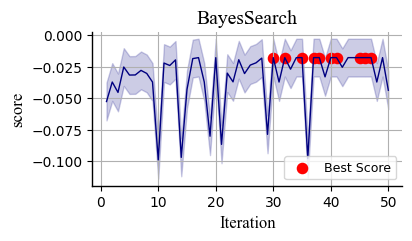

Top 1: Iteration 32, Score -0.01784196135158047
Top 2: Iteration 47, Score -0.017842350216207947
Top 3: Iteration 38, Score -0.01784243061107126
Top 4: Iteration 41, Score -0.01784248402802835
Top 5: Iteration 45, Score -0.017843098596314454
Top 6: Iteration 30, Score -0.01784374285081881
Top 7: Iteration 35, Score -0.01784462835549768
Top 8: Iteration 40, Score -0.017845238645761076
Top 9: Iteration 37, Score -0.01784843482303421
Top 10: Iteration 46, Score -0.017849899808811798


In [11]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [12]:
opt_model.best_params_

OrderedDict([('alpha', 1.603723525526279),
             ('l1_ratio', 0.0),
             ('max_iter', 100),
             ('tol', 0.01)])

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params
    )

In [27]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_model, 
           results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]

with open('results_model/resultados_modelo_brain_age_50_90_years_CN.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [10]:
with open('results_model/resultados_modelo_brain_age_50_90_years_CN.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [14]:
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)


In [15]:
df_AD_avg_test

,ID_unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected
0,0,73.0,67.425757,74.092623,-5.574243,1.092623
1,1,71.0,67.585851,72.322886,-3.414149,1.322886
2,2,90.0,65.907113,88.988001,-24.092887,-1.011999
3,3,74.0,67.070960,74.746042,-6.929040,0.746042
4,4,71.0,67.683686,72.441601,-3.316314,1.441601
...,...,...,...,...,...,...
299,309,76.0,65.850210,75.421463,-10.149790,-0.578537
300,310,71.0,67.102599,71.814457,-3.897401,0.814457
301,311,75.0,66.315355,74.898069,-8.684645,-0.101931
302,312,65.0,65.639968,64.606291,0.639968,-0.393709


In [22]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region',  'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_CN_combined = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region',  'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')


In [21]:
df_AD_combined

,ID_unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_unique,Sex,Educ,MMSE,GINI,ODQ
0,0,73.0,67.425757,74.092623,-5.574243,1.092623,Argentina,2,18.0,24.22,41.800000,98.826428
1,1,71.0,67.585851,72.322886,-3.414149,1.322886,Argentina,1,3.0,22.78,41.800000,99.458111
2,2,90.0,65.907113,88.988001,-24.092887,-1.011999,Argentina,2,12.0,26.14,41.800000,98.707401
3,3,74.0,67.070960,74.746042,-6.929040,0.746042,Argentina,2,15.0,24.70,41.800000,98.783620
4,4,71.0,67.683686,72.441601,-3.316314,1.441601,Argentina,2,6.0,23.74,41.800000,99.524933
...,...,...,...,...,...,...,...,...,...,...,...,...
299,309,76.0,65.850210,75.421463,-10.149790,-0.578537,Turquia,2,0.0,14.00,43.800000,88.091784
300,310,71.0,67.102599,71.814457,-3.897401,0.814457,Turquia,2,5.0,19.00,42.400000,94.778562
301,311,75.0,66.315355,74.898069,-8.684645,-0.101931,Turquia,2,11.0,18.00,43.308333,90.569961
302,312,65.0,65.639968,64.606291,0.639968,-0.393709,Turquia,1,11.0,25.00,43.800000,90.606547


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


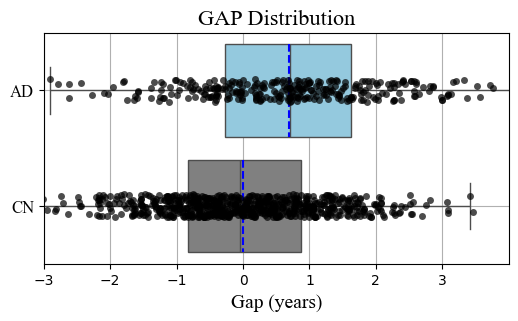

In [19]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])
corrected_gap_AD_test = pd.to_numeric(df_AD_avg_test['GAP_corrected'])


data = {
    'Error': np.concatenate([ corrected_gap_AD_test,  corrected_gap_CN_test]),
    'Grupo':  ['AD'] * len(corrected_gap_AD_test) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    #'FTD': 'red',
    #'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

In [13]:
shap_values_CN, shap_summary_sorted_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,ID_label='ID-unique', results_per_fold_train=results_per_fold_CN_train, results_per_fold_test=results_per_fold_CN_test, models_list=results_model['model'], feature_col_range= slice(None, -2)
)

Importancia de características basada en suma de valores SHAP:
IAF_ORB_left: 102.06388380764005
TF_INS_left: 92.75295602479115
TF_IFG_right: 90.00043762511957
Low_subj_spec_EPP_HPC_left: 89.07254566724784
Low_subj_spec_RPD_HPC_right: 86.88274789835583
IAF_INS_right: 85.27587254654254
Low_subj_spec_EPP_OCC_right: 84.69525266576679
IAF_HPC_left: 77.02656961017573
TF_HPC_left: 72.93479520731512
Alpha2_canon_EPP_PARIET_left: 71.27846486612621
Alpha2_canon_RPD_PARIET_left: 71.27846486612168
Low_subj_spec_RPD_HPC_left: 68.27836484337385
IAF_INS_left: 67.48632107303493
Low_subj_spec_EPP_OCC_left: 64.11421819111489
IAF_HPC_right: 63.670240728207176
TF_ORB_right: 63.22283553436443
High_subj_spec_RPD_HPC_left: 58.884837350534035
High_subj_spec_EPP_HPC_left: 58.88483735052748
TF_SFG_right: 57.7719042437198
Alpha2_canon_EPP_PARIET_right: 57.36871074610605
Alpha2_canon_RPD_PARIET_right: 57.36871074609573
High_subj_spec_RPD_HPC_right: 56.3609045228271
High_subj_spec_EPP_HPC_right: 56.36090452282624


In [15]:
shap_values_AD, shap_summary_sorted_AD = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_AD,ID_label='ID-unique',results_per_fold_train= results_per_fold_CN_train, results_per_fold_test=results_per_fold_AD_test,models_list= results_model['model'], feature_col_range=slice(None, -2)
)

Importancia de características basada en suma de valores SHAP:
IAF_ORB_left: 47.267889434693615
Low_subj_spec_EPP_HPC_left: 43.75387702427693
IAF_INS_right: 42.529589406926206
Low_subj_spec_RPD_HPC_right: 41.919168933404556
TF_INS_left: 41.66132621472461
Low_subj_spec_EPP_OCC_right: 39.75506654498821
TF_IFG_right: 39.022559070564085
IAF_HPC_left: 36.268964842148996
IAF_INS_left: 31.97064504444292
TF_HPC_left: 31.63677743840042
Alpha2_canon_EPP_PARIET_left: 31.23734286517168
Alpha2_canon_RPD_PARIET_left: 31.237342829641552
IAF_HPC_right: 30.958188311652783
Low_subj_spec_RPD_HPC_left: 29.981151944971604
Low_subj_spec_EPP_OCC_left: 29.661602710001965
TF_ORB_right: 27.165464096624277
Low_subj_spec_RPD_PARIET_right: 26.870771427217488
Alpha2_canon_RPD_PARIET_right: 25.408597708984075
Alpha2_canon_EPP_PARIET_right: 25.408597701112534
High_subj_spec_EPP_HPC_right: 24.85770196229703
High_subj_spec_RPD_HPC_right: 24.857701672011995
TF_SFG_right: 24.299300015252623
Low_subj_spec_EPP_CING_left: 2

In [16]:
with open('results_model/shap_summary_sorted_brain_age_50_90_years_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/shap_values_brain_age_50_90_years_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

with open('results_model/shap_summary_sorted_brain_age_50_90_years_AD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_AD, f)

with open('results_model/shap_values_brain_age_50_90_years_AD.pkl', 'wb') as f:
    pickle.dump(shap_values_AD, f)

In [17]:
import pickle

# Leer los archivos y cargar los datos en las mismas variables
with open('results_model/shap_summary_sorted_brain_age_50_90_years_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/shap_values_brain_age_50_90_years_CN.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)

with open('results_model/shap_summary_sorted_brain_age_50_90_years_AD.pkl', 'rb') as f:
    shap_summary_sorted_AD = pickle.load(f)

with open('results_model/shap_values_brain_age_50_90_years_AD.pkl', 'rb') as f:
    shap_values_AD = pickle.load(f)

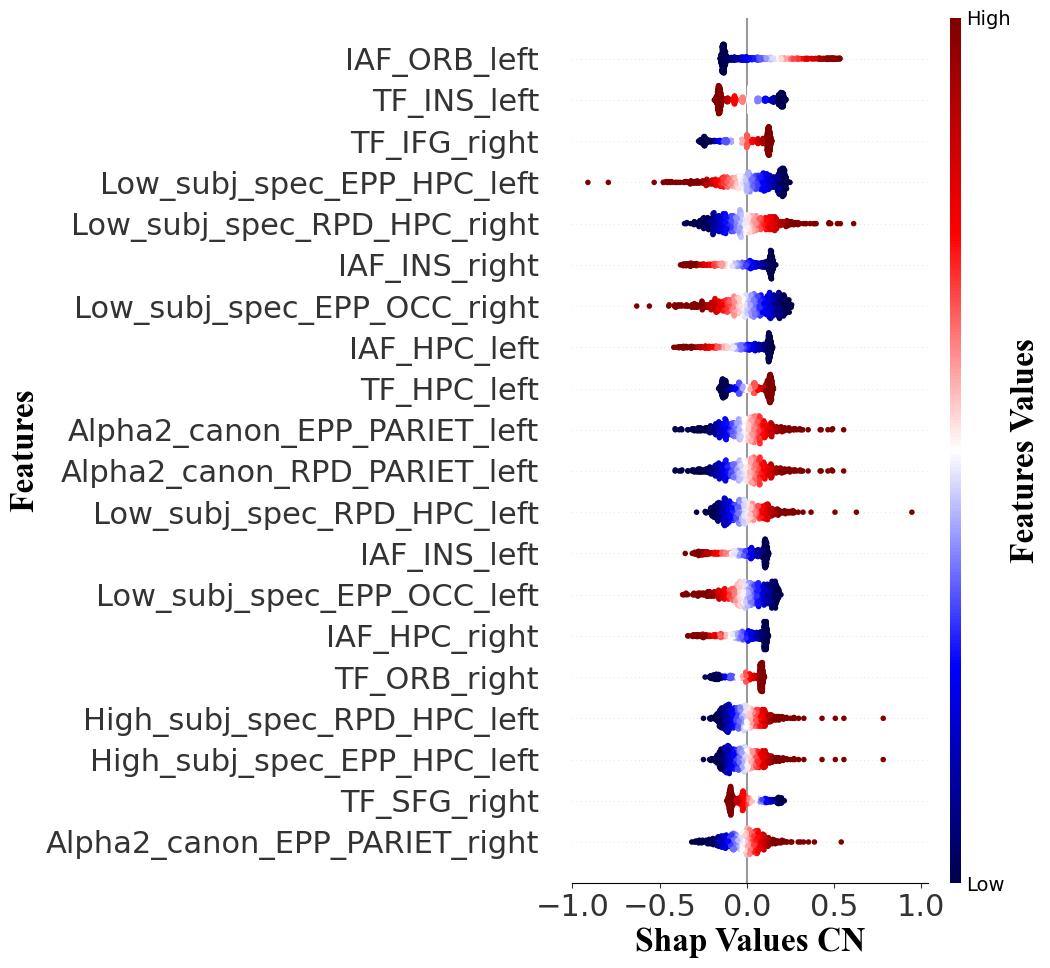

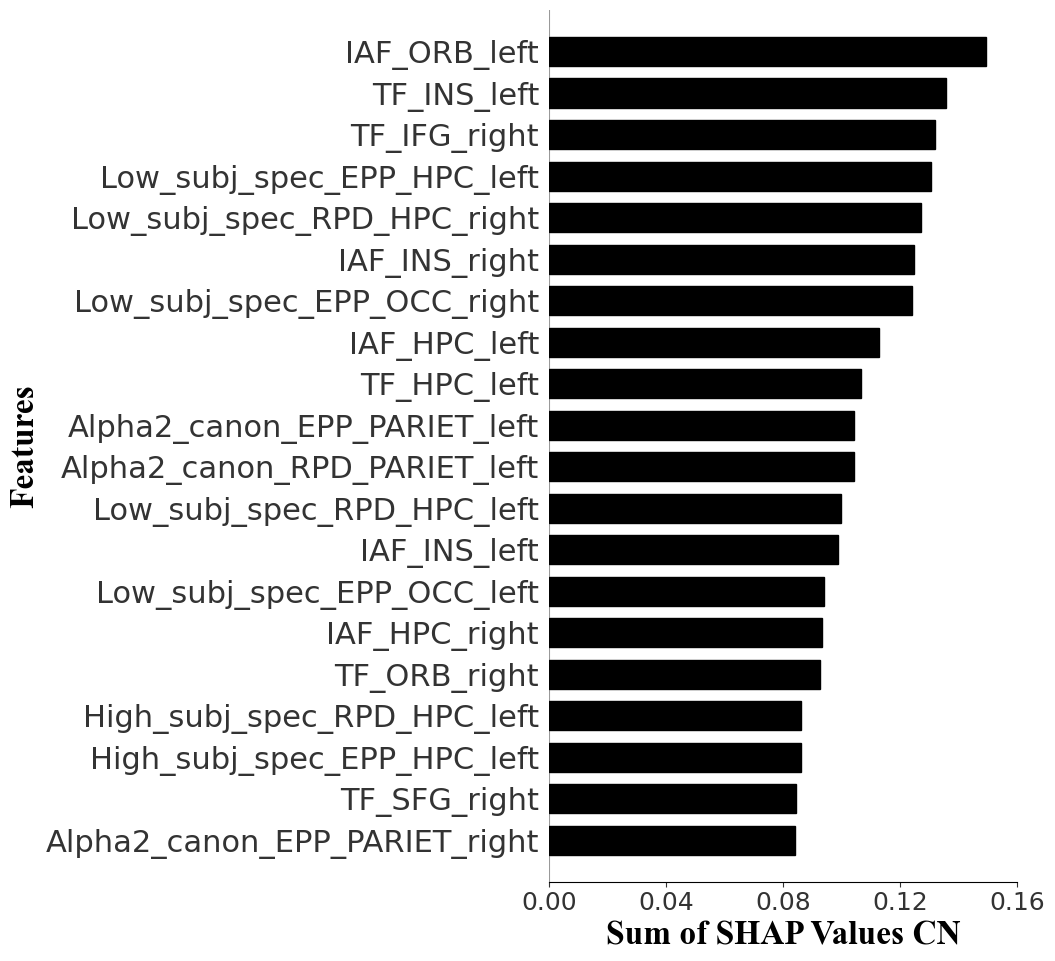

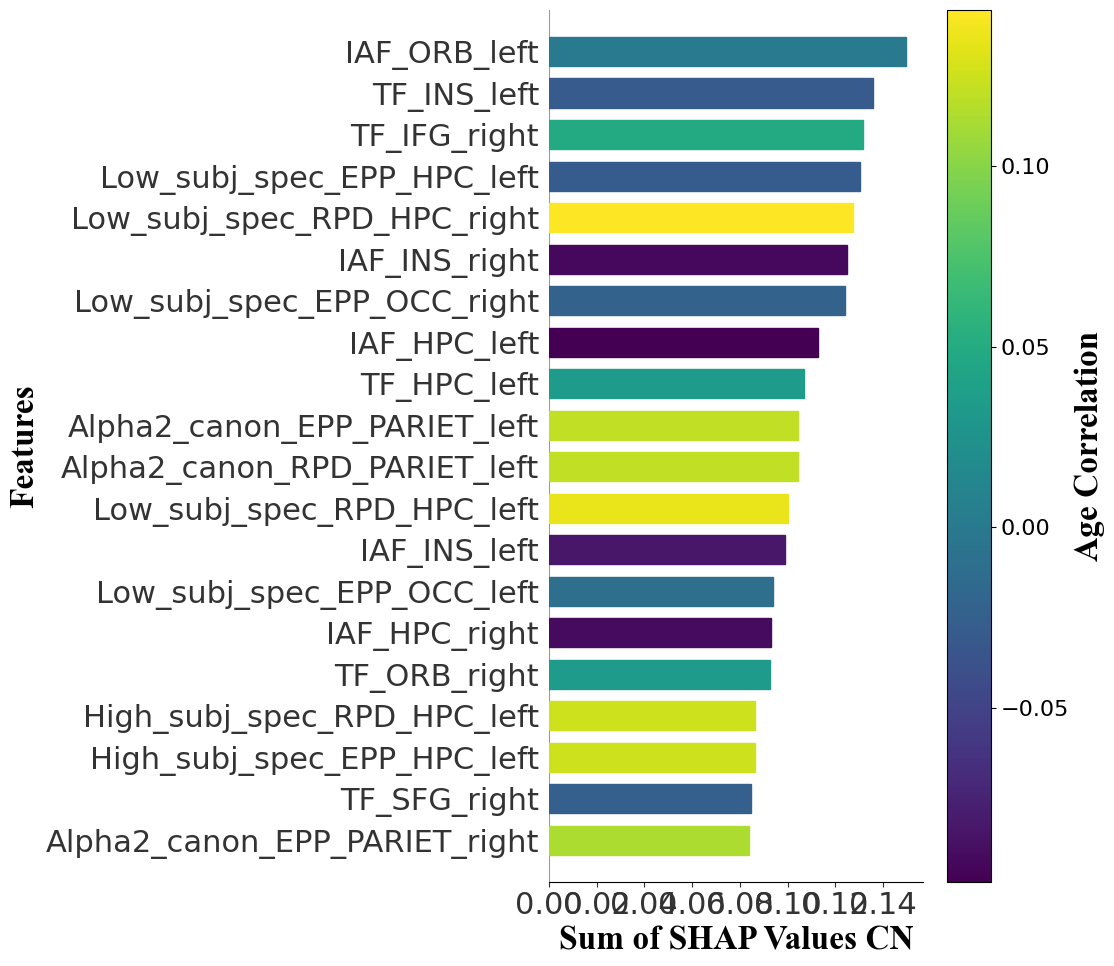

In [18]:
Plotters.plot_feature_importance(shap_values=shap_values_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [19]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

HPC_left: 1.000000
INS_left: 0.376961
HPC_right: 0.354174
PARIET_left: 0.335363
ORB_left: 0.240104
IFG_right: 0.211725
INS_right: 0.200610
OCC_right: 0.199245
OCC_left: 0.150828
ORB_right: 0.148731
SFG_right: 0.135908
PARIET_right: 0.134959


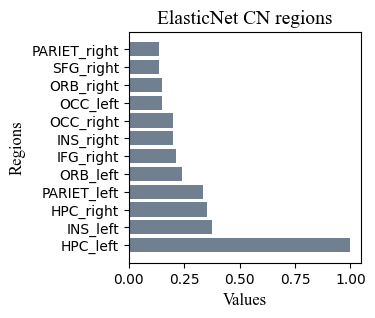

In [20]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'{nameset} CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


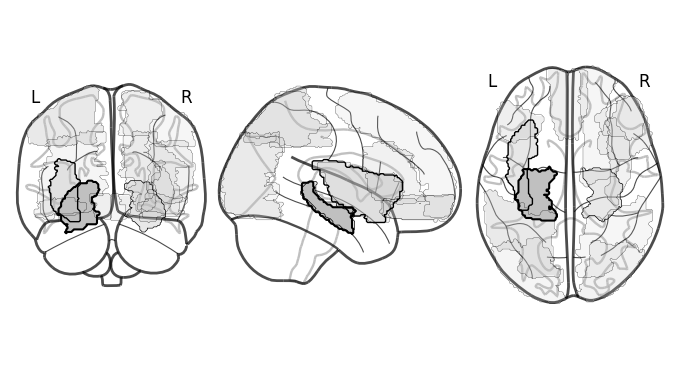

In [25]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

# America